In [1]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import visualization
from qiskit import BasicAer
from qiskit.aqua import run_algorithm
from qiskit.visualization import plot_histogram

In [2]:
backend = BasicAer.get_backend('qasm_simulator')

In [3]:
from qiskit import execute

In [4]:
q = QuantumRegister(3)
c0 = ClassicalRegister(1,'c0')
c1 = ClassicalRegister(1,'c1')
c2 = ClassicalRegister(1,'c2')

qc = QuantumCircuit(q, c0,c1,c2)
qc.u3(0.3, 0.2, 0.1, q[0])

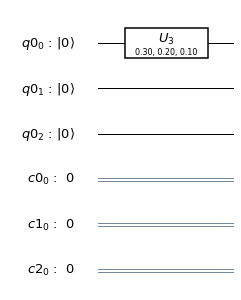

In [5]:
qc.draw(output='mpl')

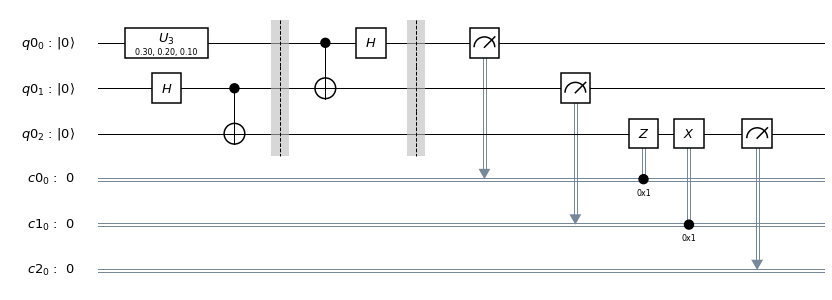

In [6]:
qc.h(q[1])
qc.cx(q[1],q[2])
qc.barrier(q)
qc.cx(q[0], q[1])
qc.h(q[0])
qc.barrier(q)

qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])
qc.z(q[2]).c_if(c0, 1)
qc.x(q[2]).c_if(c1, 1)

qc.measure(q[2], c2[0])
qc.draw(output='mpl')

In [7]:
res = execute(qc, backend, shots=1024)

In [8]:
print(res.result().get_counts(qc))

{'1 1 0': 5, '1 0 0': 7, '0 0 1': 264, '0 0 0': 251, '1 0 1': 5, '0 1 0': 224, '0 1 1': 262, '1 1 1': 6}


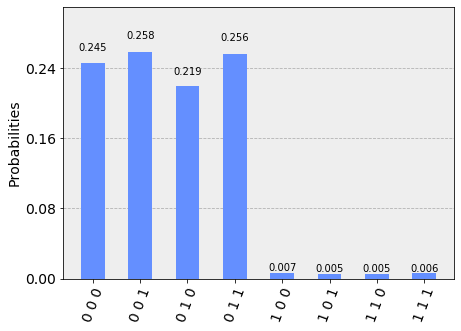

In [9]:
plot_histogram(res.result().get_counts(qc))

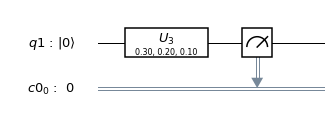

In [10]:
q1 = QuantumRegister(1)
c5 = ClassicalRegister(1)
qc2 = QuantumCircuit(q1,c5)
qc2.u3(0.3, 0.2, 0.1, q1)
qc2.measure(q1, c5)
qc2.draw(output='mpl')

In [11]:
0.006+0.006+0.008+0.004

0.024

In [12]:
j = execute(qc2, backend, shots=1024)

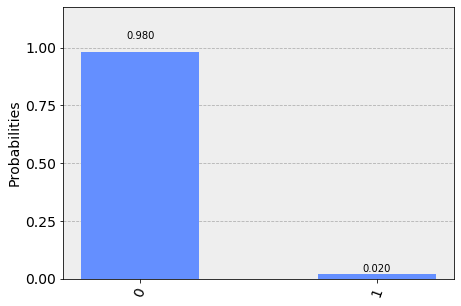

In [13]:
plot_histogram(j.result().get_counts(qc2))